In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact

%matplotlib inline

In [2]:
x, y = make_blobs(n_samples=2000, centers=4, n_features=2, cluster_std=2)

Gráficos de dispersão são utilizados para visualizar a relação entre duas variáveis contínuas.

O parâmetro alpha adiciona transparência no gráfico de dispersão, que facilita a visualização quando há muitos pontos.

In [3]:
def dispersao(alpha=1):
    plt.scatter(x[:, 0], x[:, 1], c=y, alpha=alpha)
    
interact(dispersao, alpha=(0, 1, 0.05));

interactive(children=(FloatSlider(value=1.0, description='alpha', max=1.0, step=0.05), Output()), _dom_classes…

O histograma é utilizado para visualizar a distribuição de uma variável contínua. Um número maior de barras (`bins`) pode mostrar detalhes da distribuição, mas deixa a visualização sensível a _outliers_.

In [4]:
def histograma(bins=10):
    plt.hist(x[:, 0], bins=bins)
    plt.grid()

interact(histograma, bins=(1, 20, 1));

interactive(children=(IntSlider(value=10, description='bins', max=20, min=1), Output()), _dom_classes=('widget…

Gráficos de barra são utilizados para visualizar a relação entre uma ou duas variáveis categóricas, e uma variável contínua. Quando duas variáveis categóricas são utilizadas, uma é representada através de cores.

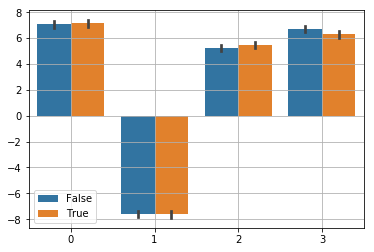

In [5]:
a = np.random.rand(2000) > 0.5
sns.barplot(x=y, y=x[:, 0], hue=a)
plt.grid();

In [6]:
df = pd.DataFrame({'attr1': x[:, 0],
                   'attr2': x[:, 1],
                   'classe': y,
                   'rand': a})
df.head()

,attr1,attr2,classe,rand
0,-7.557614,-10.294553,1,False
1,9.719828,0.445369,0,True
2,8.224568,-0.776133,3,True
3,2.676966,2.365124,2,True
4,7.592295,1.957604,0,False


A biblioteca seaborn funciona bem com os DataFrames do pandas.

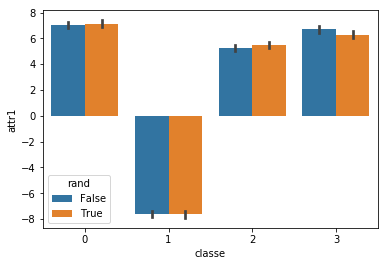

In [7]:
sns.barplot(x='classe', y='attr1', hue='rand', data=df);

Um problema que pode ocorrer ao usar barras verticais é que os indicadores do eixo X podem não caber no espaço, dado que escrevemos da esquerda para a direita (e não de cima para baixo). Esse problema pode ser evitado utilizando barras horizontais.

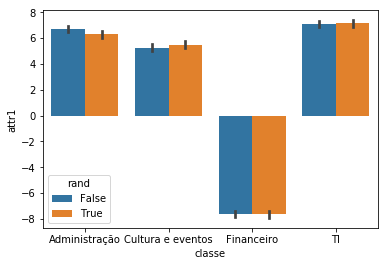

In [8]:
df['classe'] = pd.Categorical(df['classe'].replace({0: 'TI',
                                                    1: 'Financeiro',
                                                    2: 'Cultura e eventos',
                                                    3: 'Administração'}))
sns.barplot(x='classe', y='attr1', hue='rand', data=df)
#plt.xticks(rotation=45);

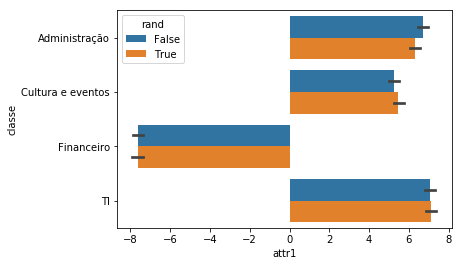

In [9]:
sns.barplot(y='classe', x='attr1', hue='rand', data=df, orient='horizontal');

O gráfico de caixas é utilizado para verificar a distribuição de uma variável, similar ao histograma. No entanto, em vez de focar na densidade, são utilizadas os valores de mínimo e máximo (representados pelos "bigodes" da caixa), o primeiro e terceiro quartis (que formam a caixa), e a mediana (o risco no meio da caixa). Pontos considerados _outliers_ são representados do lado de fora do "bigode".

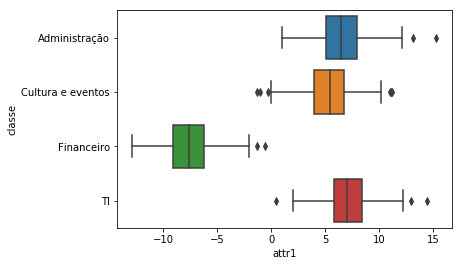

In [10]:
sns.boxplot(x='attr1', y='classe', data=df);

Um gráfico muito parecido com o de caixa é o de violino. Ele também representa os primeiro, segundo e terceiro quartis (note que o segundo quartil é a mediana), através de uma barra grossa no meio do gráfico, e um ponto branco na mediana.

A espinha passando pelo gráfico representa os 5 e 95 percentis (ou seja, ignorando os primeiros 5% e os últimos 5% dos dados). Os valores de mínimo e máximo são as pontas do gráfico.

A parte colorida é a densidade de valores, similar ao histograma, mas geralmente usando uma aproximação suavizada em vez de discretizar em barras.

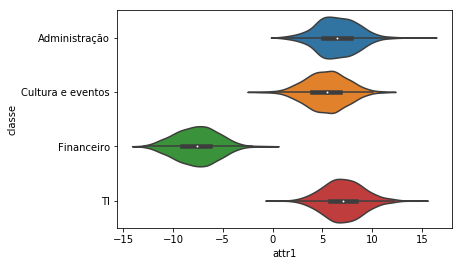

In [11]:
sns.violinplot(x='attr1', y='classe', data=df);

Um mapa de calor, ou heatmap, é somente uma representação gráfica de uma matriz, substituindo os valores numéricos por cores em uma escala.

In [12]:
m = np.random.rand(10, 10) + (np.arange(10).reshape(-1, 1) / 5) + (np.arange(10).reshape(1, -1) / 5)
m

array([[0.13025617, 0.82822058, 0.7944503 , 0.81370803, 1.14554602,
        1.9180196 , 1.82958487, 1.79323036, 2.38224247, 2.61630794],
       [0.95969459, 0.7869945 , 0.81031091, 1.67974751, 1.41788639,
        1.85767592, 1.69260258, 2.20254471, 2.68606491, 2.28246211],
       [0.69149728, 0.63007918, 1.36794981, 1.48008857, 1.90536989,
        1.56502132, 2.37050816, 2.52231043, 2.68807236, 3.1901604 ],
       [1.44562824, 1.69572672, 1.76103553, 1.98039881, 2.33819558,
        1.70855102, 1.90217796, 2.04763556, 2.95317148, 2.9199431 ],
       [1.50257255, 1.92236475, 1.51730489, 2.01559494, 2.29936884,
        2.43896666, 2.62733999, 2.51080476, 3.02374714, 3.38999373],
       [1.39629102, 2.0003386 , 1.95610391, 2.53621875, 2.57324347,
        2.90732447, 2.25402068, 3.24320456, 2.79484219, 3.15397684],
       [1.38693023, 2.06095228, 2.52619477, 2.68467918, 2.94664423,
        2.4958358 , 2.4660541 , 3.42752898, 3.70793356, 3.3552404 ],
       [1.59772417, 1.86740443, 2.2067915

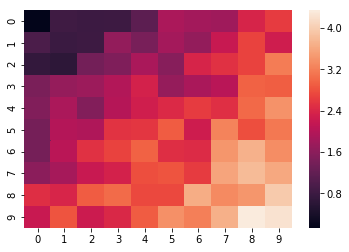

In [13]:
sns.heatmap(m)

O heatmap é normalmente utilizado para representar a relação entre duas variáveis discretas e uma variável contínua, onde geralmente pelo menos uma das variáveis discretas é ordenada.

No exemplo abaixo, temos um conjunto de dados contendo o mês, ano e quantidade de passageiros em uma certa linha aérea. As variáveis ano e mês são discretas e ordenadas, e a quantidade de passageiros pode ser considerada contínua.

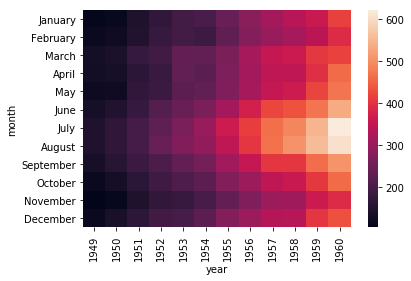

In [14]:
flights = sns.load_dataset("flights")
sns.heatmap(flights.pivot("month", "year", "passengers"));

É possível representar essa mesma informação através de gráficos de barras (pois é a relação entre duas variáveis discretas e uma contínua), mas o heatmap é mais conciso.

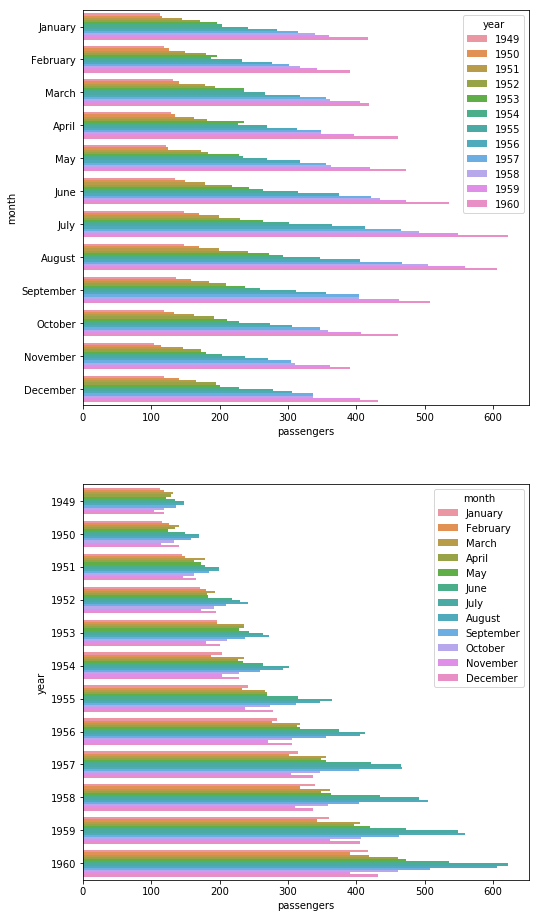

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(8, 16))
sns.barplot(y='month', hue='year', x='passengers', data=flights, ax=ax[0], orient='h')
sns.barplot(y='year', hue='month', x='passengers', data=flights, ax=ax[1], orient='h');

Um último gráfico comumente utilizado é o circular, muitas vezes chamado de "pizza", "torta" ou "rosquinha". Em geral, esse tipo de gráfico deve ser evitado.

Para o ser humano é fácil de visualizar cores e comprimentos, mas o gráfico circular utiliza conceitos de área e ângulo, que são difíceis de visualizar e podem distorcer nossa percepção.

Todo gráfico circular é facilmente convertido para um gráfico de barras, e essa transformação é sempre preferível.

In [16]:
prop = [2, 4, 0.2, 8]
labels = ['A', 'B', 'C', 'D']

def circular(espaco_branco=1.0):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(prop,
           labels=labels,
           wedgeprops={'width': espaco_branco})
    
interact(circular, espaco_branco=(0.1, 1, 0.1));

interactive(children=(FloatSlider(value=1.0, description='espaco_branco', max=1.0, min=0.1), Output()), _dom_c…

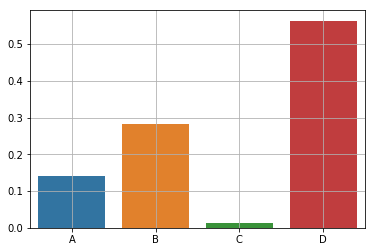

In [17]:
val = np.array(prop) / np.sum(prop)
sns.barplot(y=val, x=labels)
plt.grid();